In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patch
import numpy as np

# Monte Carlo Method in Computational Physics
난수에 기초한 방법들이 수리물리학에 어떻게 사용될 수 있는지에 대해 알아보자.

## Random Number Generator
'좋은' 난수 생성기와 '나쁜' 난수 생성기를 비교해 보자. '좋은' 난수 생성기는 `numpy.random`, '나쁜' 난수 생성기는 직접 만든 선형 합동 난수 생성기이다. 좋은걸 만들기 쉬우니까 ~~라이브러리 함수 갖다 쓰면 되니까~~ 그것부터 만들자.

In [2]:
def good_rng(num_pairs):
    rands = (np.random.random_sample((num_pairs,)) * 200).astype(np.int32)
    return (rands[0::2], rands[1::2])
good_rng(10)

(array([ 57, 105, 153,  43,  10], dtype=int32),
 array([ 46, 127, 152,  89,  48], dtype=int32))

'나쁜' 난수 생성기도 만들어 보자. 간단한 선형 합동 난수 생성기이다.

In [3]:
def bad_rng(num_pairs):
    seed = 1
    a = 91
    c = 57
    mod = 200
    rands = [seed]
    for _ in range(num_pairs - 1):
        rands.append((a * rands[-1] + c) % mod)
    rands = np.array(rands, dtype=np.int32)
    return (rands[0::2], rands[1::2])
bad_rng(10)

(array([  1, 125, 169, 133,  17], dtype=int32),
 array([148,  32,  36, 160,   4], dtype=int32))

이제 한변 생성된 난수를 시각화해 보자.

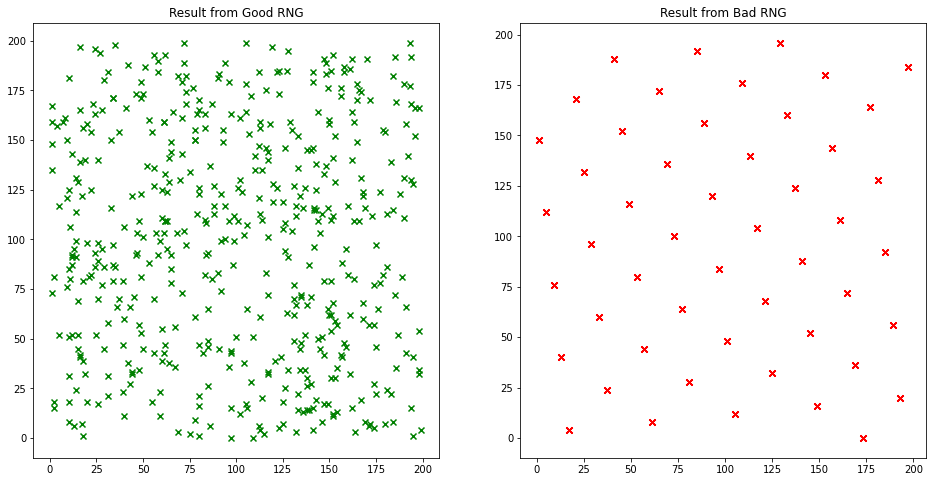

In [4]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title('Result from Good RNG')
good_X, good_Y = good_rng(1000)
plt.scatter(good_X, good_Y, c='green', marker='x')
plt.subplot(1, 2, 2)
plt.title('Result from Bad RNG')
bad_X, bad_Y = bad_rng(1000)
plt.scatter(bad_X, bad_Y, c='red', marker='x')
plt.show()

위의 scatter plot에서 볼 수 있듯, '나쁜' 난수 생성기에는 일정한 규칙이 있어 난수라고 하기 어렵다는 문제가 있다. 이러한 난수 생성기로 시뮬레이션을 수행하면 편향된 결과가 나올 것이다.

## Monte Carlo Integration
원래는 5장의 내용이지만, Monte Carlo Method로 적분을 할 수 있다. 우선 가장 유명한 $\pi$값을 구하는 예제를 살펴보자. 구간 $[0,1)$의 두 실수로 만든 순서쌍 $(x, y)$를 뽑고, 원점과의 거리가 1 미만인 것을 세면 $\pi$값을 구할 수 있다. 우선 `num_pairs`개의 무작위의 점을 찍는 함수를 만들자.

In [5]:
def gen_pairs(num_pairs):
    x_point = np.random.random_sample((num_pairs,))
    y_point = np.random.random_sample((num_pairs,))
    return (x_point, y_point)

rands = gen_pairs(10)
rands

(array([0.51957806, 0.14014004, 0.64481377, 0.26501543, 0.51745794,
        0.15601992, 0.37213223, 0.28869323, 0.4979943 , 0.40478169]),
 array([0.56818939, 0.51104543, 0.28134611, 0.30433787, 0.11345472,
        0.19503691, 0.35885524, 0.29916176, 0.99638926, 0.06947317]))

그리고, 각각의 점들이 원 속에 포함되는지를 다음과 같이 판정할 수 있다.

In [6]:
contained = rands[0] ** 2 + rands[1] ** 2 < 1
contained

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

이제 이들을 직접 그려보자.

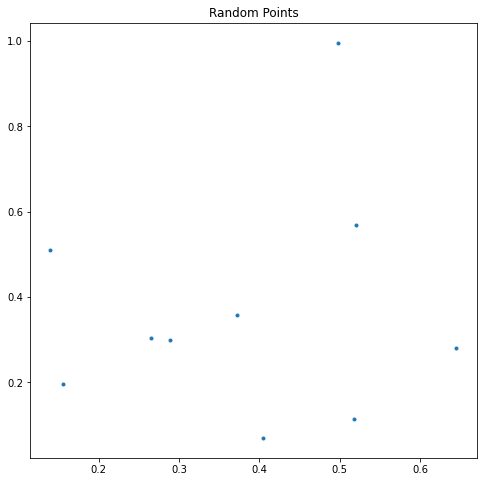

In [7]:
plt.figure(figsize=(8, 8))
plt.title('Random Points')
plt.scatter(rands[0], rands[1], marker='.')
plt.show()

이제 사분원을 그리고, 원 내부의 점과 아닌 점을 구분해 보자.

Value of pi: 2.400000


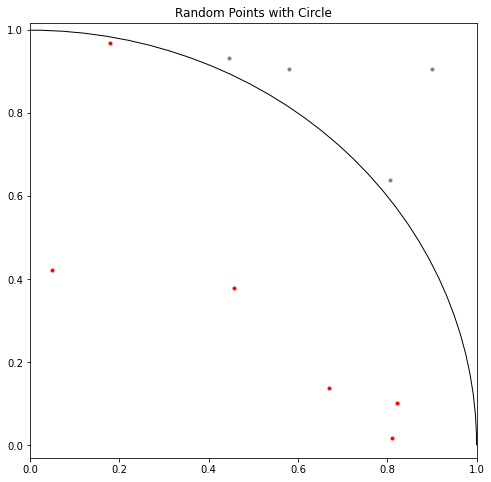

In [8]:
def plot_pi_monte_carlo(num_points):
    rands = gen_pairs(num_points)
    contained = rands[0] ** 2 + rands[1] ** 2 < 1
    print('Value of pi: %f' % (4 * len(rands[0][contained]) / num_points))
    plt.figure(figsize=(8, 8))
    plt.title('Random Points with Circle')
    plt.scatter(rands[0][contained], rands[1][contained], c='red',  marker='.')
    plt.scatter(rands[0][np.logical_not(contained)], rands[1][np.logical_not(contained)], c='gray', marker='.')
    plt.xticks(np.arange(0, 1.1, step=0.2))
    plt.yticks(np.arange(0, 1.1, step=0.2))
    plt.gca().add_patch(patch.Arc((0, 0), width=2, height=2, theta1=0, theta2=90))
    plt.show()

plot_pi_monte_carlo(10)

이제 점 개수를 늘려보자.

Value of pi: 3.320000


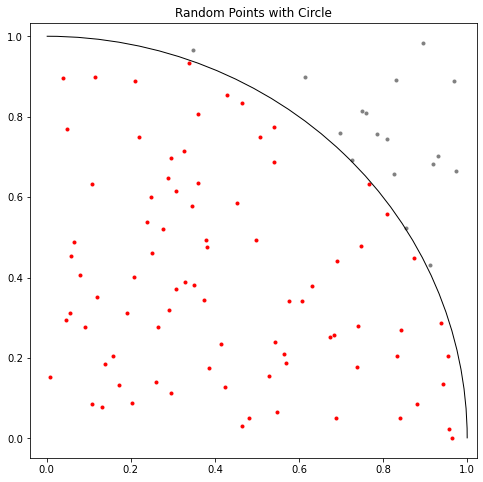

In [9]:
plot_pi_monte_carlo(100)

떠블로 늘려보자. ~~고만해 미친것아!~~

Value of pi: 3.200000


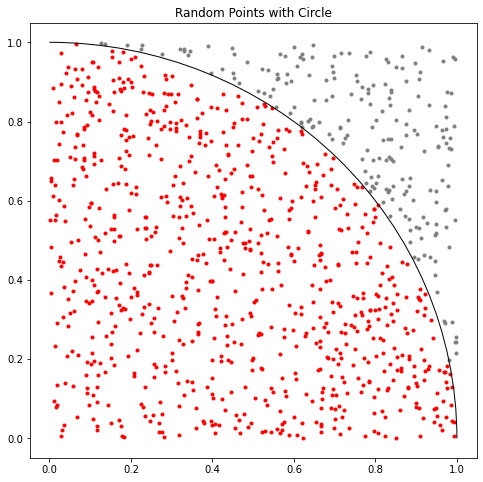

In [10]:
plot_pi_monte_carlo(1000)

매우 부정확하다. 점의 개수를 100000개 정도로 하면 되지 않을까?

Value of pi: 3.139760


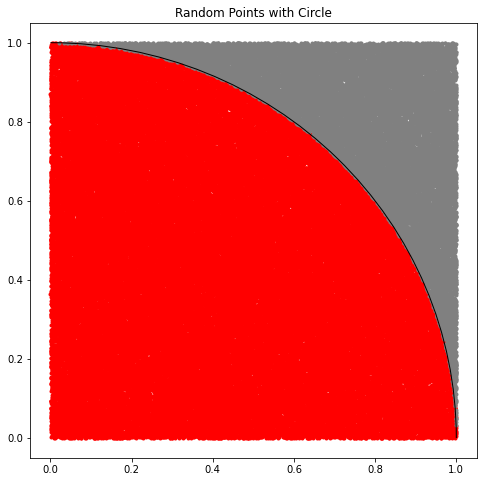

In [11]:
plot_pi_monte_carlo(100000)

이제 그나마 봐줄만한 정확도이다.